# 9.6.4 SVM with Multiple Classes

In [1]:
library(e1071)

In [2]:
set.seed(1)
x <- matrix(rnorm(200 * 2), ncol = 2)
x[1:100,] <- x[1:100,] + 2
x[101:150,] <- x[101:150,] - 2
y <- c(rep(1, 150), rep(2, 50))
dat <- data.frame(x = x, y = as.factor(y))

In [3]:
train <- sample(200, 100)
svmfit <- svm(y ~ ., data = dat[train,], kernel = "radial", gamma = 1, cost = 1)

If the response is a factor containing more than two levels, then the `svm()` function will perform multi-class classification using the one-versus-one approach. We explore that setting here by generating a third class of observations.

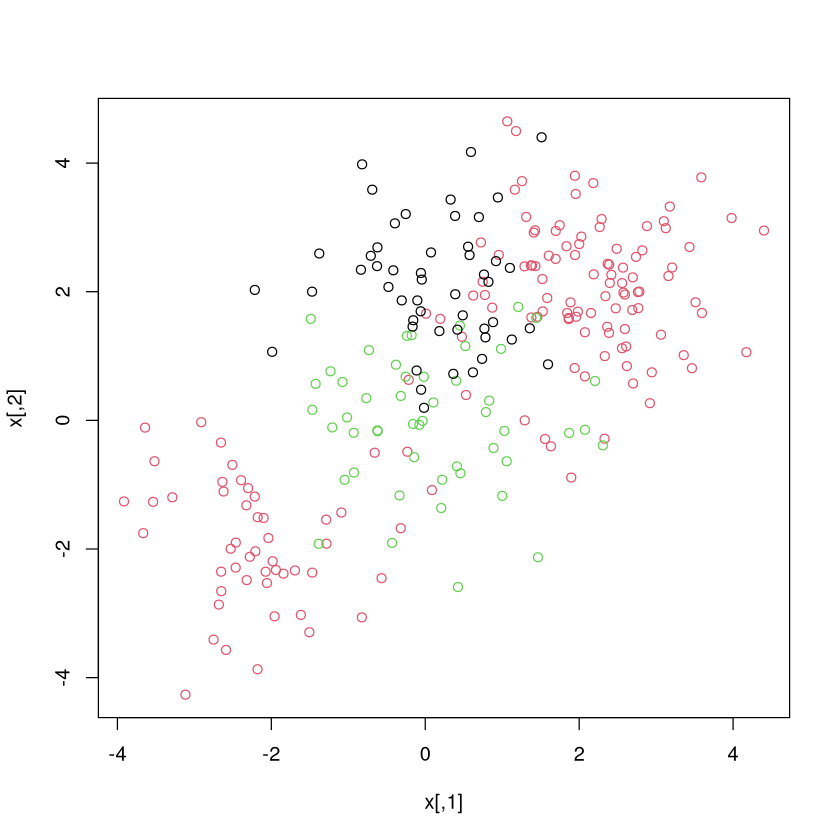

In [4]:
set.seed(1)
x <- rbind(x, matrix(rnorm(50 * 2), ncol = 2))
y <- c(y, rep(0, 50))
x[y == 0, 2] <- x[y == 0, 2] + 2
dat <- data.frame(x = x, y = as.factor(y))
par(mfrow = c(1, 1))
plot(x, col = (y + 1))

We now fit an SVM to the data:

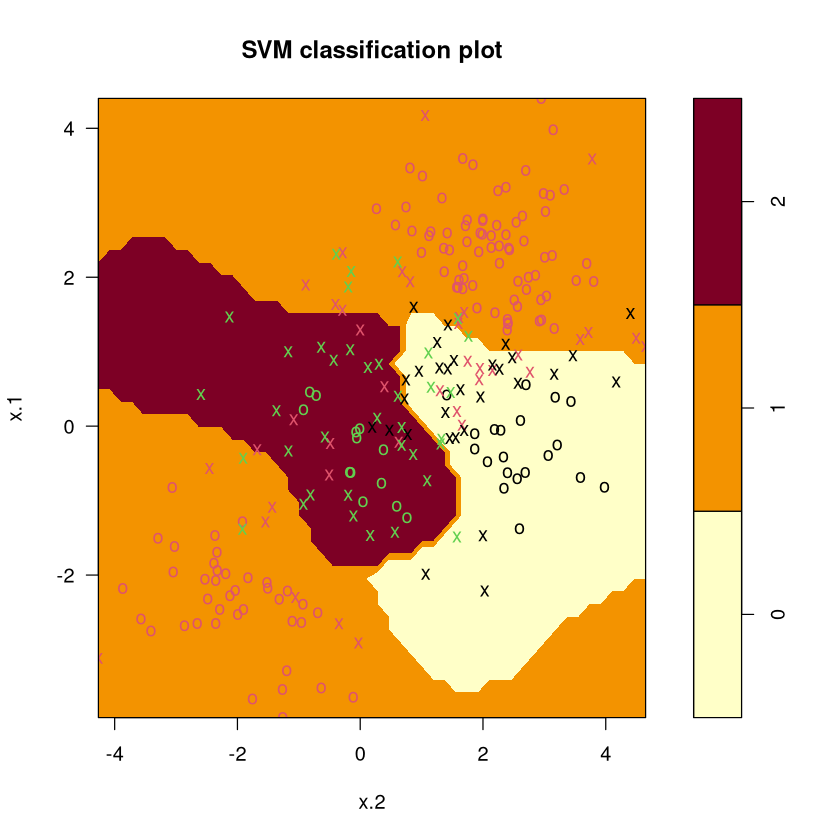

In [5]:
svmfit <- svm(y ~ ., data = dat, kernel = "radial", cost = 10, gamma = 1)
plot(svmfit, dat)

The `e1071` library can also be used to perform support vector regression if the response vector that is passed in to `svm()` is numerical rather than a factor.